# Goal: Predicting the game between Lebron James and Michael Jordan



## Include requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams["figure.figsize"] = (5,4)

## Import files


In [2]:
import os
import pandas as pd

path = "./data/"
dfs = {}

for file_name in os.listdir(path):
    if file_name.endswith('.csv'):
        name = file_name.split('.')[0]
        dfs[name] = pd.read_csv(path+file_name)
        
print(dfs.keys())


/var/folders/3g/y0mg2f4j3w13nmlwczchnxj80000gn/T/ipykernel_19503/976074652.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(path+file_name)


dict_keys(['target_away', 'teams', 'target_home', 'players', 'games', 'target', 'ranking', 'games_details', 'target_result'])


## Inspect  data
* The most important data are:.
* 

## Games data

In [3]:
games=dfs['games']

In [4]:
games.tail()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
26646,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26647,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26648,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26649,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1
26650,2014-10-04,11400001,Final,1610612748,1610612740,2014,1610612748,86.0,0.431,0.679,...,18.0,42.0,1610612740,98.0,0.462,0.706,0.438,19.0,42.0,0


In [5]:
games.columns=games.columns.str.lower()

In [6]:
games.columns

Index(['game_date_est', 'game_id', 'game_status_text', 'home_team_id',
       'visitor_team_id', 'season', 'team_id_home', 'pts_home', 'fg_pct_home',
       'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'team_id_away',
       'pts_away', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away',
       'reb_away', 'home_team_wins'],
      dtype='object')

## Detailed games data

In [7]:
g_details=dfs['games_details']

In [8]:
g_details.tail(20)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
668608,11200005,1610612746,LAC,Los Angeles,202339,Eric Bledsoe,NaN,NaN,NaN,34,...,0.0,8.0,8.0,6.0,5.0,0.0,5.0,4.0,25.0,NaN
668609,11200005,1610612746,LAC,Los Angeles,203180,Hank Thorns,NaN,NaN,NaN,6,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,NaN
668610,11200005,1610612746,LAC,Los Angeles,2037,Jamal Crawford,NaN,NaN,NaN,27,...,0.0,0.0,0.0,5.0,1.0,0.0,3.0,1.0,19.0,NaN
668611,11200005,1610612746,LAC,Los Angeles,1885,Lamar Odom,NaN,NaN,NaN,14,...,0.0,3.0,3.0,0.0,1.0,0.0,2.0,3.0,4.0,NaN
668612,11200005,1610612746,LAC,Los Angeles,2440,Matt Barnes,NaN,NaN,NaN,28,...,2.0,5.0,7.0,0.0,4.0,2.0,5.0,2.0,15.0,NaN
668613,11200005,1610612746,LAC,Los Angeles,101142,Ronny Turiaf,NaN,NaN,NaN,23,...,1.0,1.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,NaN
668614,11200005,1610612746,LAC,Los Angeles,200797,Ryan Hollins,NaN,NaN,NaN,13,...,2.0,3.0,5.0,1.0,2.0,1.0,3.0,4.0,2.0,NaN
668615,11200005,1610612746,LAC,Los Angeles,2584,Willie Green,NaN,NaN,NaN,29,...,0.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,5.0,NaN
668616,11200005,1610612743,DEN,Denver,2738,Andre Iguodala,NaN,NaN,NaN,25,...,0.0,3.0,3.0,3.0,3.0,1.0,3.0,0.0,8.0,NaN
668617,11200005,1610612743,DEN,Denver,1853,Anthony Carter,NaN,NaN,NaN,22,...,0.0,1.0,1.0,7.0,1.0,0.0,4.0,1.0,4.0,NaN


In [9]:
g_details.columns=g_details.columns.str.lower()

In [10]:
g_details['player_name'].unique().size

2664

In [11]:
games.loc[games['game_id']==10300001]

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,ast_home,reb_home,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins
19288,2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,...,23.0,41.0,1610612742,85.0,0.447,0.5,0.25,20.0,38.0,1


### Calculating the total number of turnovers per game for every team

In [12]:
turn=g_details.groupby(['game_id', 'team_id'])['to'].sum()

In [13]:
turnovers=turn.reset_index()
turnovers

,game_id,team_id,to
0,10300001,1610612742,18.0
1,10300001,1610612762,18.0
2,10300002,1610612749,24.0
3,10300002,1610612763,25.0
4,10300003,1610612739,25.0
...,...,...,...
53042,52100131,1610612759,6.0
53043,52100201,1610612737,13.0
53044,52100201,1610612739,11.0
53045,52100211,1610612740,8.0


In [14]:
to_away = turnovers[turnovers.index % 2 == 0]
to_away=to_away.rename(columns={'to': 'to_away'})
to_away=to_away.set_index('game_id')

In [15]:
to_home = turnovers[turnovers.index % 2 ==1]
to_home=to_home.rename(columns={'to': 'to_home'})
to_home=to_home.set_index('game_id')

In [16]:
all_to=pd.concat([to_home,to_away], axis=1)
all_to.drop('team_id', axis=1, inplace=True)
all_to.reset_index(inplace=True)

### Adding the turnovers to the games dataframe

In [17]:
games=pd.merge(games,all_to, on='game_id')
games

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,to_home,to_away
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1,17.0,17.0
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1,11.0,10.0
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1,10.0,19.0
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1,12.0,22.0
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0,15.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26548,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1,23.0,15.0
26549,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0,19.0,19.0
26550,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1,16.0,16.0
26551,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1,27.0,14.0


In [18]:
# Sanity check
games.loc[games['game_id']==10300001]

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,team_id_away,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,to_home,to_away
19190,2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,...,1610612742,85.0,0.447,0.5,0.25,20.0,38.0,1,18.0,18.0


### Adding a column showing the point difference

In [19]:
games['result']=games['pts_home']-games['pts_away']
games

,game_date_est,game_id,game_status_text,home_team_id,visitor_team_id,season,team_id_home,pts_home,fg_pct_home,ft_pct_home,...,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,to_home,to_away,result
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,117.0,0.478,0.815,0.321,23.0,44.0,1,17.0,17.0,9.0
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,112.0,0.561,0.765,0.333,20.0,37.0,1,11.0,10.0,8.0
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,106.0,0.470,0.682,0.433,20.0,46.0,1,10.0,19.0,8.0
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,93.0,0.392,0.735,0.261,15.0,46.0,1,12.0,22.0,20.0
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,110.0,0.500,0.773,0.292,20.0,47.0,0,15.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26548,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,87.0,0.366,0.643,0.375,17.0,43.0,1,23.0,15.0,6.0
26549,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,85.0,0.411,0.636,0.267,17.0,47.0,0,19.0,19.0,-4.0
26550,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,95.0,0.387,0.659,0.500,19.0,43.0,1,16.0,16.0,3.0
26551,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,94.0,0.469,0.725,0.385,18.0,45.0,1,27.0,14.0,5.0


## Players data

In [20]:
players=dfs['players']

In [21]:
players.size

28912

In [22]:
player_cols=players.columns

In [23]:
players.groupby(['PLAYER_NAME' ])['TEAM_ID'].count()
# player id changes when a player changes teams

PLAYER_NAME
AJ Hammons             2
AJ Price               8
Aaron Brooks          11
Aaron Craft            1
Aaron Gordon           6
                      ..
Zhou Qi                2
Zion Williamson        1
Zoran Dragic           2
Zydrunas Ilgauskas     2
Zylan Cheatham         1
Name: TEAM_ID, Length: 1749, dtype: int64

## What we have fron Lebron and Michael:m

In [24]:
features=['pts', 'reb', 'ast', 'stl', 'blk', 'to', 'fg_pct', 'fg3_pct', 'ft_pct']

### Appropriating the games dataframe with fropping irrelevant features according to out goal:

In [25]:
games.columns

Index(['game_date_est', 'game_id', 'game_status_text', 'home_team_id',
       'visitor_team_id', 'season', 'team_id_home', 'pts_home', 'fg_pct_home',
       'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'team_id_away',
       'pts_away', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away',
       'reb_away', 'home_team_wins', 'to_home', 'to_away', 'result'],
      dtype='object')

In [26]:
games.drop(['game_date_est', 'game_id', 'game_status_text', 'home_team_id', 'home_team_id',
       'visitor_team_id', 'season', 'team_id_home','team_id_away', 'home_team_wins','pts_home','pts_away' ], axis=1, inplace=True)

In [27]:
games

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,to_home,to_away,result
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0,17.0,17.0,9.0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0,11.0,10.0,8.0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0,10.0,19.0,8.0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0,12.0,22.0,20.0
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0,15.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26548,0.419,0.821,0.421,24.0,50.0,0.366,0.643,0.375,17.0,43.0,23.0,15.0,6.0
26549,0.338,0.719,0.381,18.0,40.0,0.411,0.636,0.267,17.0,47.0,19.0,19.0,-4.0
26550,0.448,0.682,0.500,29.0,45.0,0.387,0.659,0.500,19.0,43.0,16.0,16.0,3.0
26551,0.440,0.771,0.333,21.0,30.0,0.469,0.725,0.385,18.0,45.0,27.0,14.0,5.0


In [28]:
games.columns

Index(['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
       'to_home', 'to_away', 'result'],
      dtype='object')

In [29]:
games=games[['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'to_home', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
       'to_away', 'result']]

In [30]:
games

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,to_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,to_away,result
0,0.484,0.926,0.382,25.0,46.0,17.0,0.478,0.815,0.321,23.0,44.0,17.0,9.0
1,0.488,0.952,0.457,16.0,40.0,11.0,0.561,0.765,0.333,20.0,37.0,10.0,8.0
2,0.482,0.786,0.313,22.0,37.0,10.0,0.470,0.682,0.433,20.0,46.0,19.0,8.0
3,0.441,0.909,0.297,27.0,49.0,12.0,0.392,0.735,0.261,15.0,46.0,22.0,20.0
4,0.429,1.000,0.378,22.0,47.0,15.0,0.500,0.773,0.292,20.0,47.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26548,0.419,0.821,0.421,24.0,50.0,23.0,0.366,0.643,0.375,17.0,43.0,15.0,6.0
26549,0.338,0.719,0.381,18.0,40.0,19.0,0.411,0.636,0.267,17.0,47.0,19.0,-4.0
26550,0.448,0.682,0.500,29.0,45.0,16.0,0.387,0.659,0.500,19.0,43.0,16.0,3.0
26551,0.440,0.771,0.333,21.0,30.0,27.0,0.469,0.725,0.385,18.0,45.0,14.0,5.0


In [31]:
games_home=games[['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'to_home']]
games_away=games[[ 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
       'to_away']]
results_home_away=games[['result']]

In [32]:
games_home

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,to_home
0,0.484,0.926,0.382,25.0,46.0,17.0
1,0.488,0.952,0.457,16.0,40.0,11.0
2,0.482,0.786,0.313,22.0,37.0,10.0
3,0.441,0.909,0.297,27.0,49.0,12.0
4,0.429,1.000,0.378,22.0,47.0,15.0
...,...,...,...,...,...,...
26548,0.419,0.821,0.421,24.0,50.0,23.0
26549,0.338,0.719,0.381,18.0,40.0,19.0
26550,0.448,0.682,0.500,29.0,45.0,16.0
26551,0.440,0.771,0.333,21.0,30.0,27.0


In [42]:
games.to_csv('./data/target.csv')
games_home.to_csv('./data/target_home.csv')
games_away.to_csv('./data/target_away.csv')
results_home_away.to_csv('./data/target_result.csv')

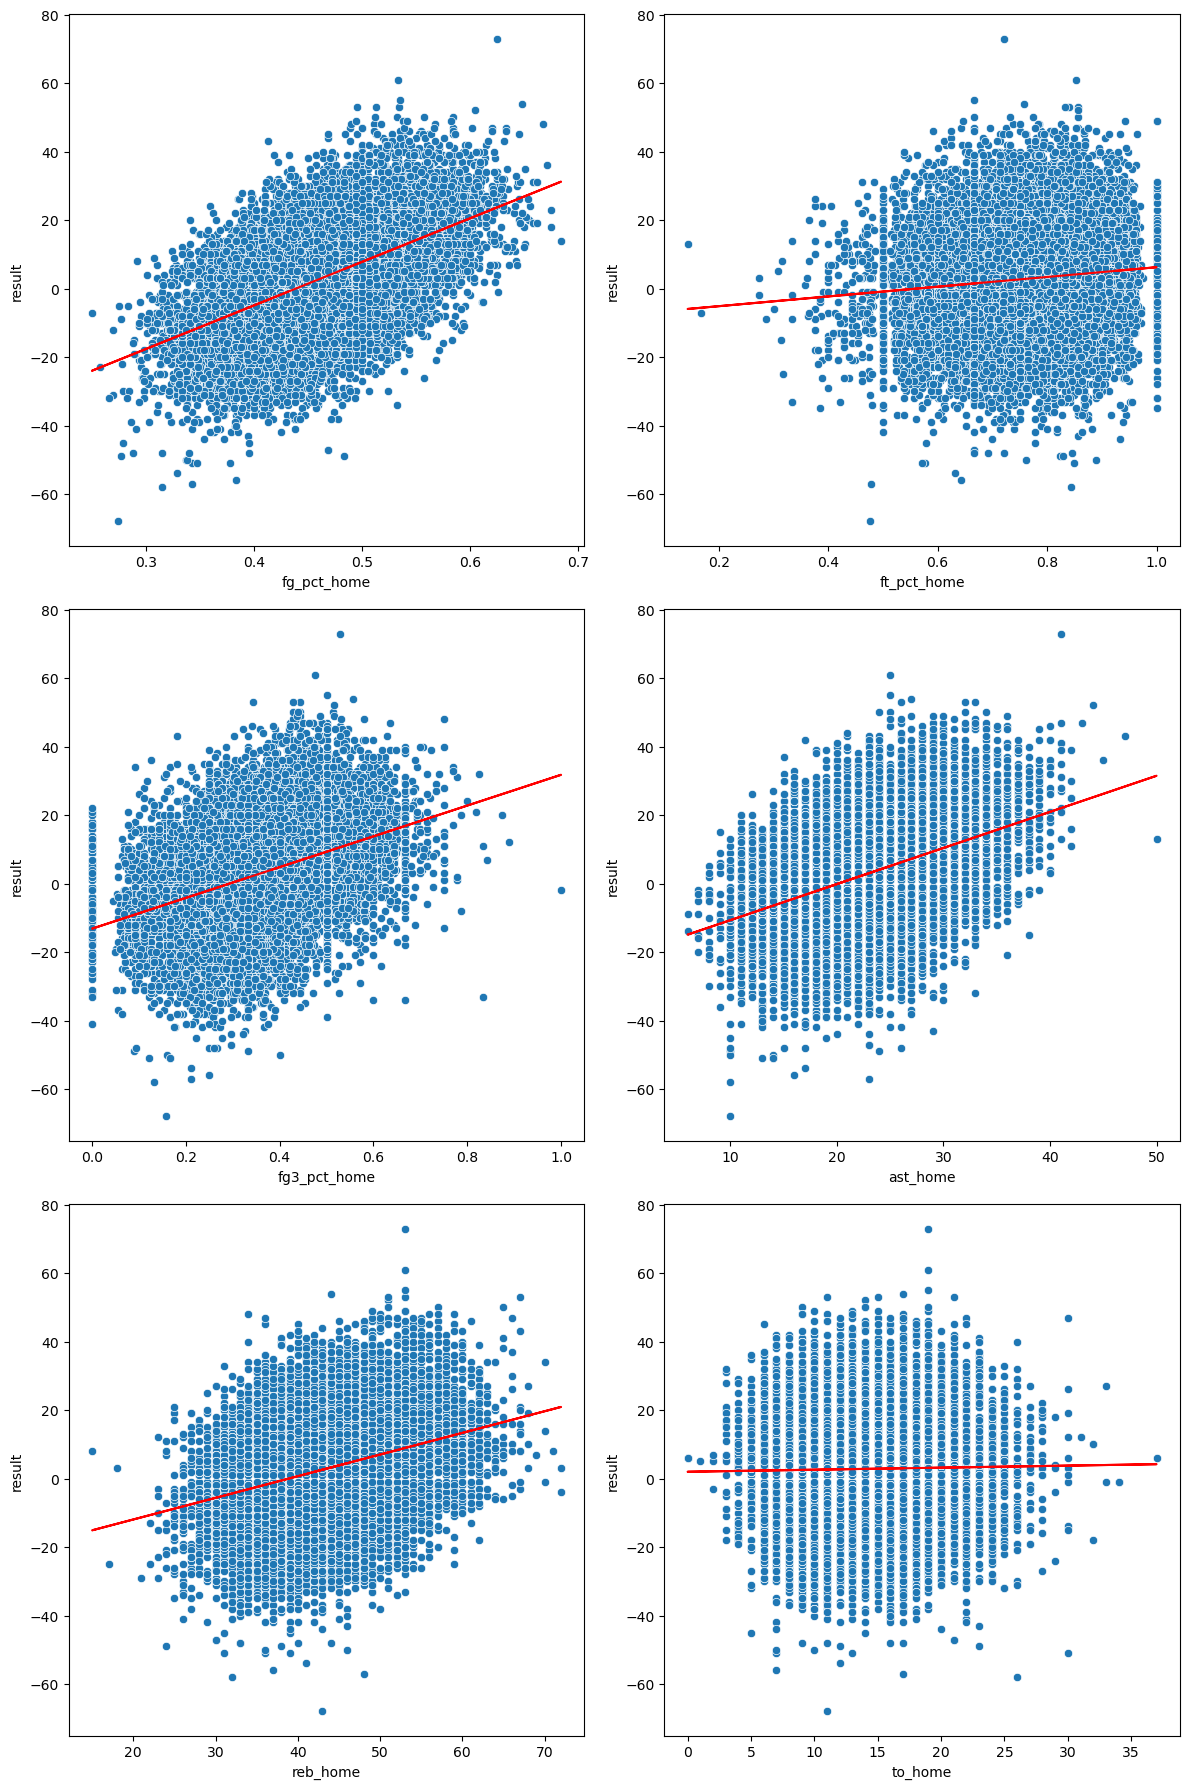

In [33]:
from scipy import stats
import matplotlib.pyplot as plt

cols=['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'to_home']
num_cols = len(cols)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
axs = axs.flatten()  # Flatten the axes array

for i, col in enumerate(cols):
    ax = axs[i]

    sns.scatterplot(x=col, y='result', data=games, ax=ax)

    # Fit the line using numpy.polyfit
    slope, intercept, r_value, p_value, std_err = stats.linregress(games[col], games['result'])
    line = slope * games[col] + intercept

    # Plot the fitted line
    ax.plot(games[col], line, color='red')

    ax.set_xlabel(col)
    ax.set_ylabel('result')

plt.tight_layout()
plt.show()

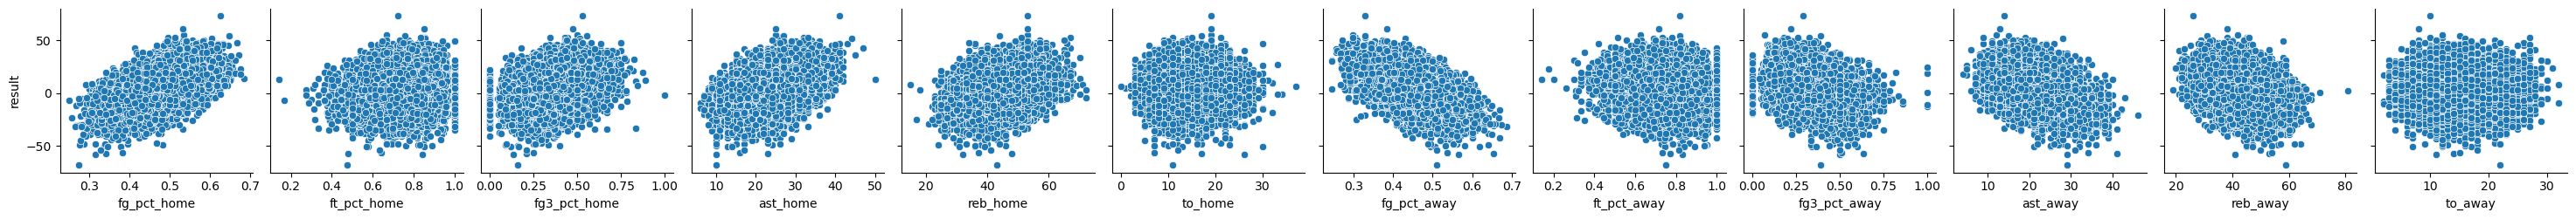

In [34]:
sns.pairplot( x_vars=['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'to_home', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away',
       'to_away'], y_vars=['result'], data=games)

In [35]:
#pip install lightgbm

## Train

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# load dataset
data = games

# separate features and target variable
X = data.drop("result", axis=1)
y = data["result"]



# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a list of regression models
models = [
    RandomForestRegressor(),
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    XGBRegressor(),
    #LGBMRegressor()
]

# fit each model on the training data and make predictions on the test data
rmses = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmses.append(rmse)



                        Model       RMSE
0       RandomForestRegressor   7.173104
1            LinearRegression   6.944043
2                       Ridge   6.941491
3                       Lasso   9.664759
4                  ElasticNet   9.665047
5                         SVR   9.636090
6       DecisionTreeRegressor  10.418886
7         KNeighborsRegressor  10.345836
8   GradientBoostingRegressor   6.974996
9           AdaBoostRegressor   7.579762
10               XGBRegressor   6.967111


In [38]:
# create a table to compare the results
table = pd.DataFrame({
    "Model": [type(model).__name__ for model in models],
    "RMSE_test": rmses
})

# display the table
print(table)

                        Model  RMSE_test
0       RandomForestRegressor   7.173104
1            LinearRegression   6.944043
2                       Ridge   6.941491
3                       Lasso   9.664759
4                  ElasticNet   9.665047
5                         SVR   9.636090
6       DecisionTreeRegressor  10.418886
7         KNeighborsRegressor  10.345836
8   GradientBoostingRegressor   6.974996
9           AdaBoostRegressor   7.579762
10               XGBRegressor   6.967111


## Now on train-data to see the rmse on train data

In [37]:
rmses_train = []
for model in models:
#    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
    rmses_train.append(rmse_train)

# create a table to compare the results
table_train = pd.DataFrame({
    "Model": [type(model).__name__ for model in models],
    "RMSE_train": rmses_train
})

# display the table
print(table_train)

                        Model  RMSE_train
0       RandomForestRegressor    2.711735
1            LinearRegression    6.973573
2                       Ridge    6.974939
3                       Lasso    9.755895
4                  ElasticNet    9.752933
5                         SVR    9.722809
6       DecisionTreeRegressor    0.000000
7         KNeighborsRegressor    8.564980
8   GradientBoostingRegressor    6.736251
9           AdaBoostRegressor    7.627707
10               XGBRegressor    5.037337



#### The column below trains only for linreg

In [53]:

#turnovers do not have a crucial role i. prediction
#games1=games.drop(columns=['to_away','to_home' ],axis=1)
# # load dataset
# data = games

# # separate features and target variable
# X = data.drop("result", axis=1)
# y = data["result"]



# # split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # create a list of regression models
# models1 = [
#     LinearRegression()]


# # fit each model on the training data and make predictions on the test data
# rmses1 = []
# for model in models1:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     rmses1.append(rmse)

# # create a table to compare the results
# table = pd.DataFrame({
#     "Model": [type(model).__name__ for model in models],
#     "RMSE": rmses1
# })

# # display the table
# print(table)

In [56]:
import random
a=np.random.choice(X_test.index)
print(int(model.predict(X_test.loc[X_test.index==a])))
print(y_test.loc[y_test.index==a])

-11
18363   -3.0
Name: result, dtype: float64


### Prepare Lebron vs Jordan:

In [57]:
X_train.columns


Index(['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home',
       'to_home', 'fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away',
       'reb_away', 'to_away'],
      dtype='object')

In [58]:


# Lebron to the home team:
 
df = pd.DataFrame({
    'fg_pct_home': [0.505],
    'ft_pct_home': [0.735],
    'fg3_pct_home': [0.345],
    'ast_home': [7.3*5],
    'reb_home': [7.5*5],
    'to_home':[3.5],
    'fg_pct_away': [0.497],
    'ft_pct_away': [0.835],
    'fg3_pct_away': [0.327],
    'ast_away': [5.3*5],
    'reb_away': [6.2*5],
    'to_away':[2.7*5]
})
df



,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,to_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,to_away
0,0.505,0.735,0.345,36.5,37.5,3.5,0.497,0.835,0.327,26.5,31.0,13.5


## Predict
rmses

In [59]:

rmses

[7.1709254870222665,
 6.944043233035345,
 6.941490841645733,
 9.664759120252853,
 9.665046975303072,
 9.63608964815864,
 10.396960145512226,
 10.345836464048702,
 6.975835114681261,
 7.585558024483646,
 6.9671111027529635]

In [60]:
y_pred=[]
valid=[]
x=''
for i, model in enumerate(models):
    y_pred.append(np.round(model.predict(df)))
    if  y_pred[i]>0 and np.abs(y_pred[i])-rmses[i]>0:
        x='Lebron wins above the error'
    elif y_pred[i]>0 and np.abs(y_pred[i])-rmses[i]<0:
        x='Lebron wins but not signifanctly enough'
    elif y_pred[i]<0 and np.abs(y_pred[i])-rmses[i]>0:
        x='Jordan wins above the error'
    elif y_pred[i]<0 and np.abs(y_pred[i])-rmses[i]<0:
        x='Jordan wins but not signifanctly enough' 
    elif y_pred[i]==0:
        x='Draw' 
    else:
        x='Whatt?'
    valid.append(x)

# create a table to compare the results
table = pd.DataFrame({
    "Model": [type(model).__name__ for model in models],
    "Lebron":y_pred,
    "valid": valid,
    "RMSE": rmses,
})

# display the table
print(table)




                        Model  Lebron  \
0       RandomForestRegressor   [4.0]   
1            LinearRegression   [7.0]   
2                       Ridge   [7.0]   
3                       Lasso  [15.0]   
4                  ElasticNet  [15.0]   
5                         SVR  [14.0]   
6       DecisionTreeRegressor  [-5.0]   
7         KNeighborsRegressor  [21.0]   
8   GradientBoostingRegressor   [1.0]   
9           AdaBoostRegressor   [7.0]   
10               XGBRegressor  [-1.0]   

                                      valid       RMSE  
0   Lebron wins but not signifanctly enough   7.170925  
1               Lebron wins above the error   6.944043  
2               Lebron wins above the error   6.941491  
3               Lebron wins above the error   9.664759  
4               Lebron wins above the error   9.665047  
5               Lebron wins above the error   9.636090  
6   Jordan wins but not signifanctly enough  10.396960  
7               Lebron wins above the error  10.345

In [61]:
models
    

[RandomForestRegressor(),
 LinearRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(),
 SVR(),
 DecisionTreeRegressor(),
 KNeighborsRegressor(),
 GradientBoostingRegressor(),
 AdaBoostRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)]

In [62]:
models_name = [
    "RandomForestRegressor.pkl", "LinearRegression.pkl", "Ridge.pkl", "Lasso.pkl", "ElasticNet.pkl","SVR.pkl",
 "DecisionTreeRegressor.pkl",
 "KNeighborsRegressor.pkl",
 "GradientBoostingRegressor.pkl",
 "AdaBoostRegressor.pkl",
 "XGBRegressor.pkl"
]

In [63]:
import joblib

In [64]:
for name, model in zip(models_name, models):
    joblib.dump(model,name)
    

In [65]:
my_trained=joblib.load("./RandomForestRegressor.pkl")

In [69]:
my_trained.predict(df)[0]

NameError: name 'my_trained' is not defined